## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical # type: ignore
from keras.models import load_model # type: ignore

In [9]:
data = []
labels = []
classes = 43
cur_path = 'traffic_sign_data'
lab = pd.read_csv('labels.csv')

## Sample Images of Dataset

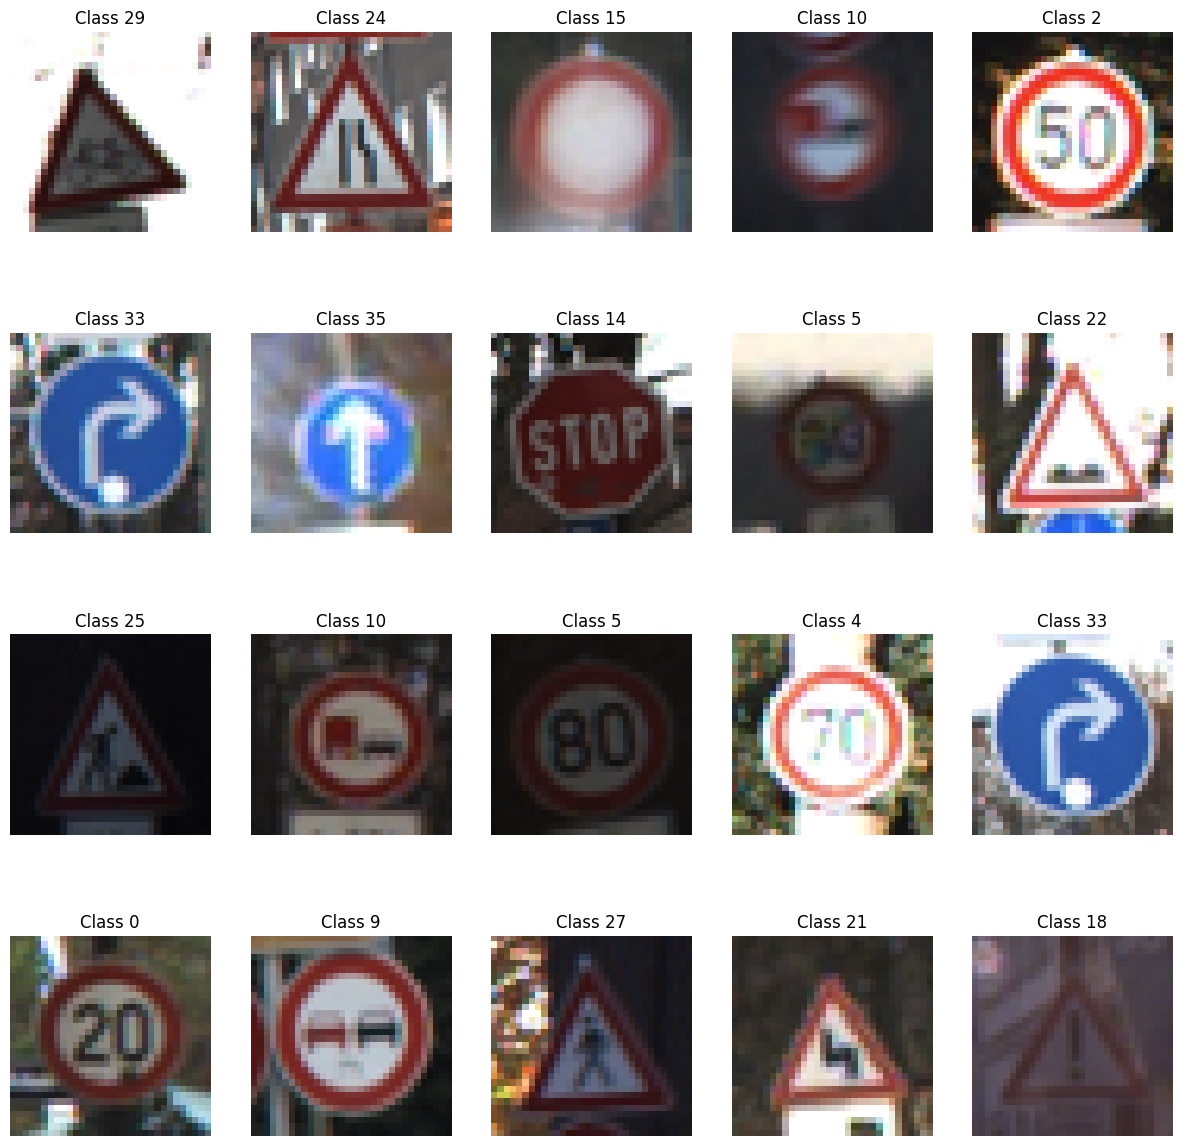

In [10]:
num_images_per_class = 200  
total_images_to_show = 20
plt.figure(figsize=(15, 15))

for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)

    selected_images = images  

    for a in selected_images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((32, 32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

data = np.array(data)
labels = np.array(labels)
shuffle_indices = np.arange(len(data)) 
np.random.shuffle(shuffle_indices)
data = data[shuffle_indices]
labels = labels[shuffle_indices]

for i in range(total_images_to_show):
    plt.subplot(4, 5, i + 1)
    plt.imshow(data[i])
    plt.title(f"Class {labels[i]}")
    plt.axis('off')

plt.show()

## Visualizing countplot of the classes

C:\Users\admin\AppData\Local\Temp\ipykernel_11140\3220695300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3', legend=False)


Text(0.5, 0, 'Count of Samples/Observations')

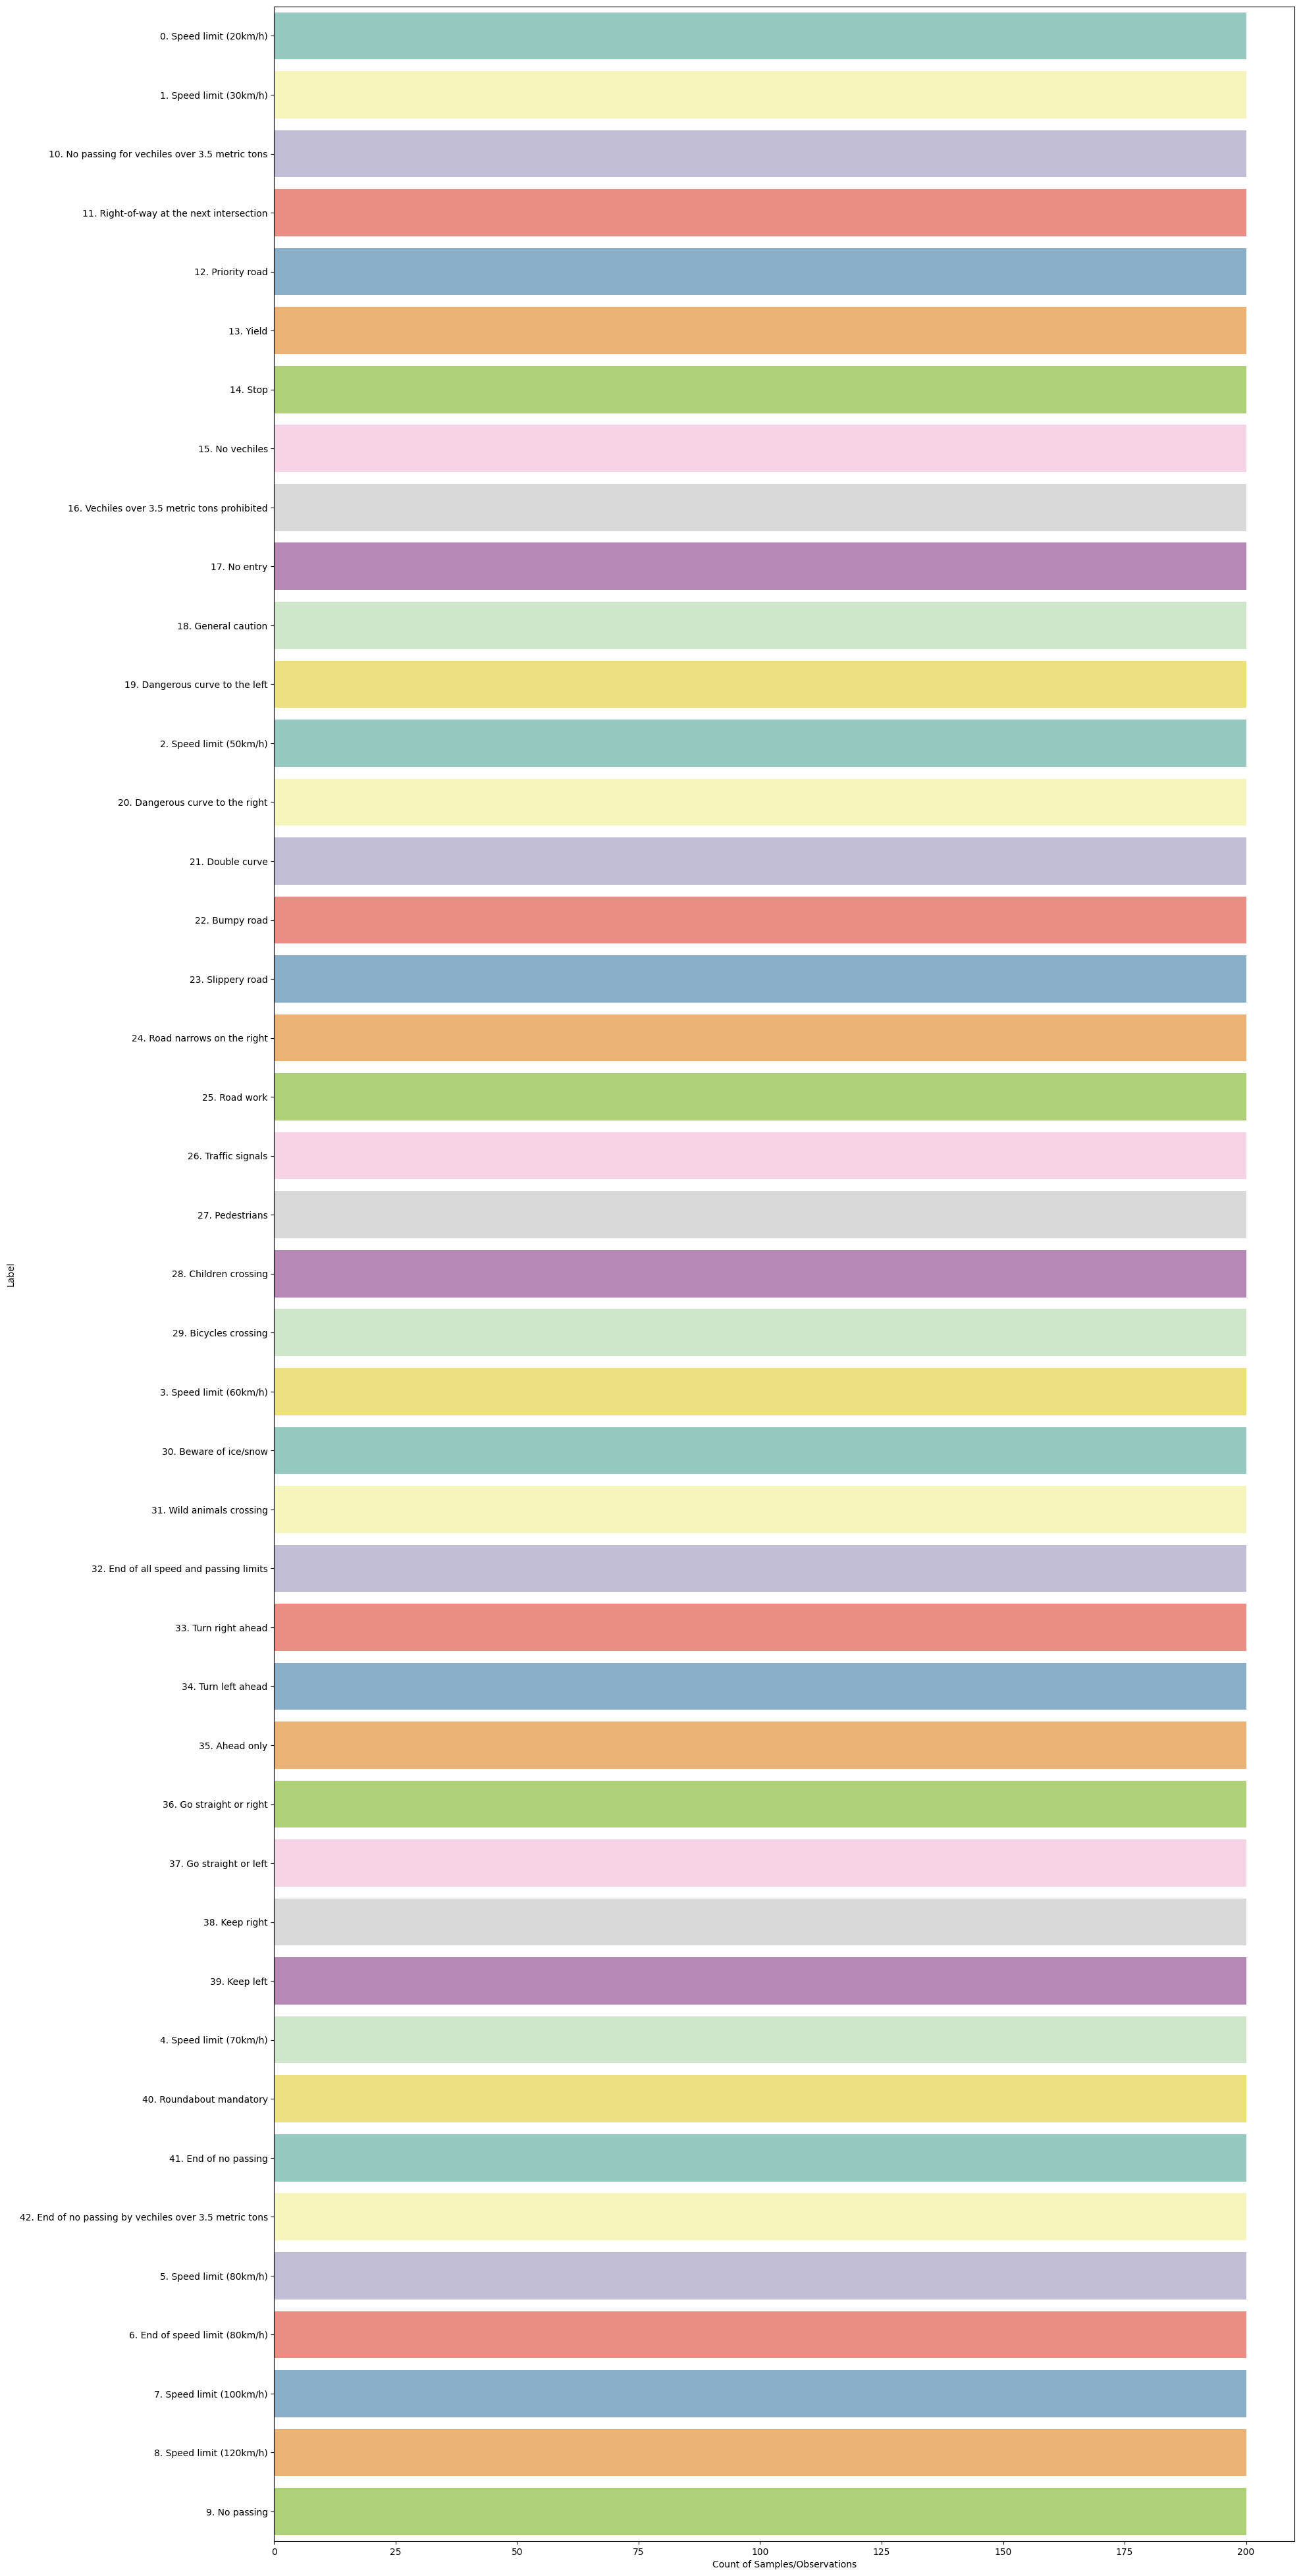

In [11]:
d = dict() # lưu số lượng mẫu/hình ảnh của từng lớp.
class_labels = dict() # lưu tên của từng lớp dựa trên ID lớp.

for dirs in os.listdir(cur_path + '/Train'):
    count = len(os.listdir(cur_path+'/Train/' + dirs))
    d[dirs+'. '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (20, 50))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3', legend=False)
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations')

## Dividing data into train and test in the split percentage of 80:20

In [12]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=43) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8600, 32, 32, 3) (8600,)
(6880, 32, 32, 3) (1720, 32, 32, 3) (6880,) (1720,)


In [13]:
y_train = to_categorical(y_train, num_classes=43)
y_test= to_categorical(y_test, num_classes=43)

## Build the model

In [14]:
from keras.utils import to_categorical # type: ignore
from keras.models import Model # type: ignore
from keras.optimizers import Adam # type: ignore
from keras.callbacks import ModelCheckpoint # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from keras.callbacks import EarlyStopping # type: ignore
class VGG30:
    def build(input_shape, classes):
        model = Sequential()
        
        # Block 1
        model.add(Conv2D(64, (3, 3), padding="same", input_shape=input_shape, activation="relu"))
        model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Block 2
        model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Block 3
        model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Block 4
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # Block 5
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        
        # Block 6
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # Block 7
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
        
        
        # Fully connected layers
        model.add(Flatten())
        model.add(Dense(4096, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation="relu"))
        model.add(Dropout(0.5))
        
        # Output layer
        model.add(Dense(classes, activation="softmax"))
        return model


In [15]:
input_shape = (32, 32, 3) 
num_classes = 43  
model = VGG30.build(input_shape, num_classes)
model.summary()

c:\TrafficSignDetection\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 1, 1, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 1, 1, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 1, 1, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             

 Total params: 47,932,267 (182.85 MB)

 Trainable params: 47,932,267 (182.85 MB)

 Non-trainable params: 0 (0.00 B)

## Visualising Model Architecture

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes =True, to_file='VGG30_model.png', dpi=250)

## Compiling the Model

In [ ]:
from keras.optimizers import Adam # type: ignore
from keras.callbacks import ModelCheckpoint, EarlyStopping # type: ignore
# Xác định kích thước đầu vào và số lớp đầu ra
input_shape = (32, 32, 3) 
num_classes = 43  
model = VGG30.build(input_shape, num_classes)


checkpoint = ModelCheckpoint(
    'best_model_vgg30.keras',
    monitor='val_accuracy', # Giám sát độ chính xác trên tập validation
    verbose=1, # Mức độ chi tiết của thông tin 
    save_best_only=True,
    mode='max', # Tìm giá trị lớn nhất của val_accuracy
    save_freq='epoch' # Lưu mô hình sau mỗi epoch
)

# Định nghĩa Early Stopping
early_stopping = EarlyStopping( 
    monitor='val_loss', # Giám sát giá trị mất mát trên tập validation
    patience=5,
    restore_best_weights=True # Khôi phục trọng số của mô hình tốt nhất
)

# Biên dịch mô hình 
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Huấn luyện mô hình với checkponint & early stopping
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

## Saving and Evaluating model

In [13]:
model.save('vgg30_model.keras')

In [16]:
model = load_model('Structures\\Model VGG30 - 99,30\\vgg30_model.keras')

In [46]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9931 - loss: 0.0218
Accuracy:  0.9930232763290405 
Loss    :  0.035567138344049454


In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Classification Report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load your CSV data
df = pd.read_csv('labels.csv')
pred = np.argmax(model.predict(X_test), axis=1)
class_label = len(df)

report = classification_report(np.argmax(y_test, axis=1), pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report.csv', index=True)

labels = [class_labels[i] for i in range(43)]
print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

print("Classification report has been saved to CSV files.")

## Confusion Matrix

In [ ]:
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels)

## The predictions of unseen data

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 32, 32, 3)))))

In [3]:
model = load_model('Structures\\Model VGG30 - 98,31\\vgg30_model.keras')

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Danh sách các class
classes = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',
           'Speed limit (80km/h)','End of speed limit (80km/h)',
           'Speed limit (100km/h)','Speed limit (120km/h)','No passing','No passing veh over 3.5 tons','Right-of-way at intersection',
           'Priority road','Yield','Stop','No vehicles','Veh > 3.5 tons prohibited','No entry','General caution',
           'Dangerous curve left','Dangerous curve right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
           'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing',
           'Beware of ice/snow','Wild animals crossing','End speed + passing limits','Turn right ahead', 'Turn left ahead',
           'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left',
           'Roundabout mandatory','End of no passing','End no passing veh > 3.5 tons']

def predict_image(image_path, model):
    image = Image.open(image_path)
    image = image.resize((32, 32))
    image_np = np.array(image)
    image_np = image_np.reshape(1, 32, 32, 3)

    prediction = model.predict(image_np)
    predicted_label = np.argmax(prediction)
    predicted_class = classes[predicted_label]

    plt.title(predicted_class)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


image_path = r"traffic_sign_data\Test\00011.png" 


predict_image(image_path, model)

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Danh sách các class
classes = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',
           'Speed limit (80km/h)','End of speed limit (80km/h)',
           'Speed limit (100km/h)','Speed limit (120km/h)','No passing','No passing veh over 3.5 tons','Right-of-way at intersection',
           'Priority road','Yield','Stop','No vehicles','Veh > 3.5 tons prohibited','No entry','General caution',
           'Dangerous curve left','Dangerous curve right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
           'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing',
           'Beware of ice/snow','Wild animals crossing','End speed + passing limits','Turn right ahead', 'Turn left ahead',
           'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left',
           'Roundabout mandatory','End of no passing','End no passing veh > 3.5 tons']

image_dir = 'testing_images'
image_files = os.listdir(image_dir)
plt.figure(figsize=(20, 10))

for i, image_name in enumerate(image_files[:50]):  
    image_path = os.path.join(image_dir, image_name)

    image = Image.open(image_path)
    image = image.resize((32, 32))
    image_np = np.array(image)
    image_np = image_np.reshape(1, 32, 32, 3)

    prediction = model.predict(image_np)
    predicted_label = np.argmax(prediction)
    predicted_class = classes[predicted_label]

    plt.subplot(10, 5, i + 1) 
    plt.imshow(image)
    plt.title(predicted_class)
    plt.axis('off')

plt.tight_layout()
plt.show()
